#Brain Tumor Object Detection

Implementing a brain tumor detection system using YOLOv8. Curate a diverse dataset, annotate images, and train models for accurate detection. Emphasizing ethical healthcare data usage, this project seeks robust precision and recall in identifying brain tumors through the YOLOv8 along with different sizes and optimizers

# Data Collection

A carefully curated brain MRI dataset was utilized for training and validating the YOLOv8 model for brain tumor detection.
The dataset encompasses four classes: Glioma Tumor, Meningioma Tumor, Pituitary Tumor, and No Tumor.
MRI scans were sourced from publicly available repositories such as Kaggle, ensuring a broad representation of clinical variations.

The dataset was systematically divided into Training and Validation subsets to ensure effective learning and unbiased evaluation:

Training Set:

Glioma Tumor: 1,153 images

Meningioma Tumor: 1,449 images

Pituitary Tumor: 1,424 images

No Tumor: 711 images

Validation Set:

Glioma Tumor: 136 images

Meningioma Tumor: 140 images

Pituitary Tumor: 136 images

No Tumor: 100 images

This structured distribution was designed to expose the model to diverse tumor presentations during training, while ensuring rigorous evaluation on an independent validation set.
The wide range of tumor types and healthy brain scans strengthens the model’s generalization ability to unseen clinical cases.

# Importing Libraries

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling n

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import cv2
import math
import os
import zipfile
import random
import shutil
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# EDA

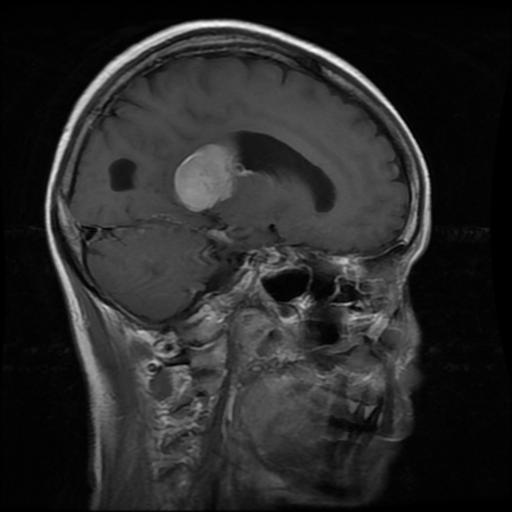

In [ ]:
sample_image = Image.open("/content/drive/MyDrive/brain_tumor_yolo_dataset/images/train/Meningioma/images/Tr-me_1043.jpg")
sample_image

In [ ]:
sample_image.size

(512, 512)

In [ ]:
train_images_path = '/content/drive/MyDrive/brain_tumor_yolo_dataset/images/train'
val_images_path = '/content/drive/MyDrive/brain_tumor_yolo_dataset/images/val'


In [ ]:
train_counts = []
val_counts = []

In [ ]:
train_count = 0
for root, dirs, files in os.walk(train_images_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            train_count += 1

val_count = 0
for root, dirs, files in os.walk(val_images_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            val_count += 1
print(f"Training Images: {train_count}")
print(f"Validation Images: {val_count}")

Training Images: 4737
Validation Images: 512


Classes found: ['Pituitary', 'Glioma', 'Meningioma', 'No Tumor']


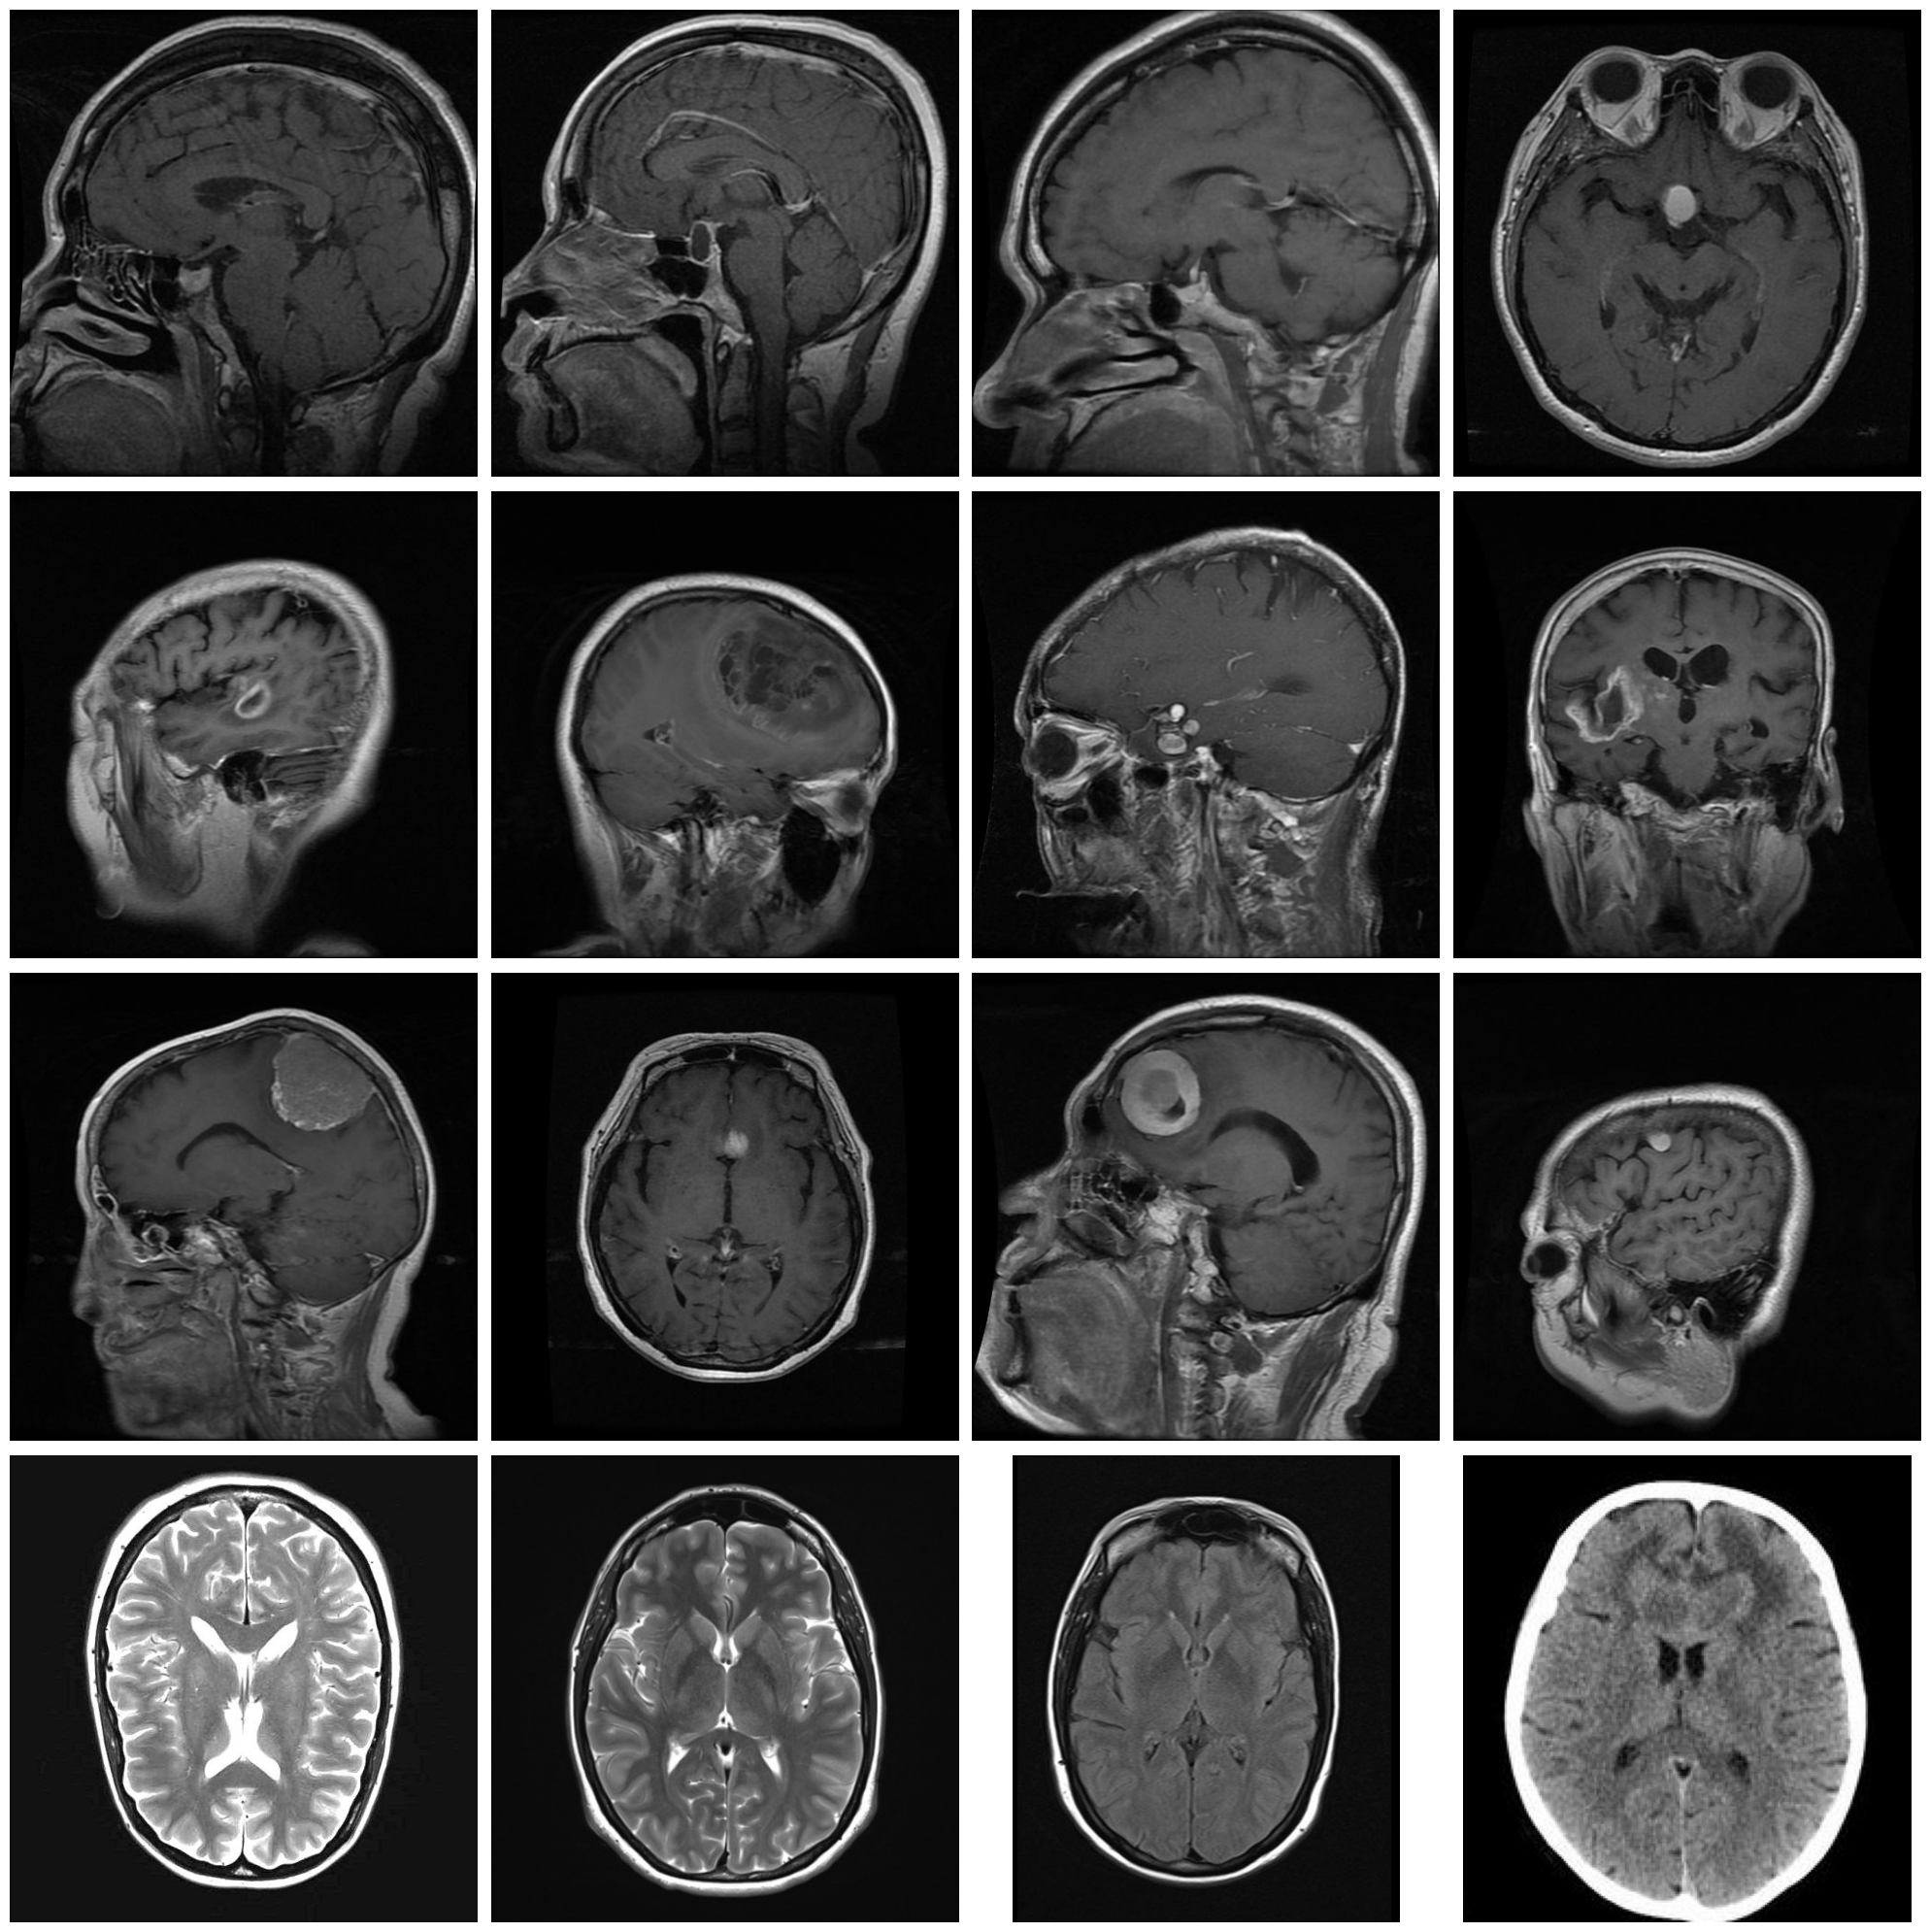

In [ ]:
train_images_path = '/content/drive/MyDrive/brain_tumor_yolo_dataset/images/train'

all_classes = [cls for cls in os.listdir(train_images_path) if not cls.startswith('.')]
print(f"Classes found: {all_classes}")
images_per_class = 4
plt.figure(figsize=(5 * images_per_class, 5 * len(all_classes)))
for class_idx, tumor_class in enumerate(all_classes):
    class_images_path = os.path.join(train_images_path, tumor_class, 'images')
    if not os.path.exists(class_images_path):
        print(f"No images folder found for {tumor_class}, skipping.")
        continue
    all_images = [img for img in os.listdir(class_images_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if len(all_images) == 0:
        print(f"No images found inside {tumor_class}/images/, skipping.")
        continue
    sample_images = random.sample(all_images, min(images_per_class, len(all_images)))
    for img_idx, img_name in enumerate(sample_images):
        img_path = os.path.join(class_images_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt_idx = class_idx * images_per_class + img_idx + 1
        plt.subplot(len(all_classes), images_per_class, plt_idx)
        plt.imshow(img)
        if img_idx == 0:
            plt.ylabel(tumor_class, fontsize=16)  # Label the class on the left
        plt.axis('off')

plt.tight_layout()
plt.show()

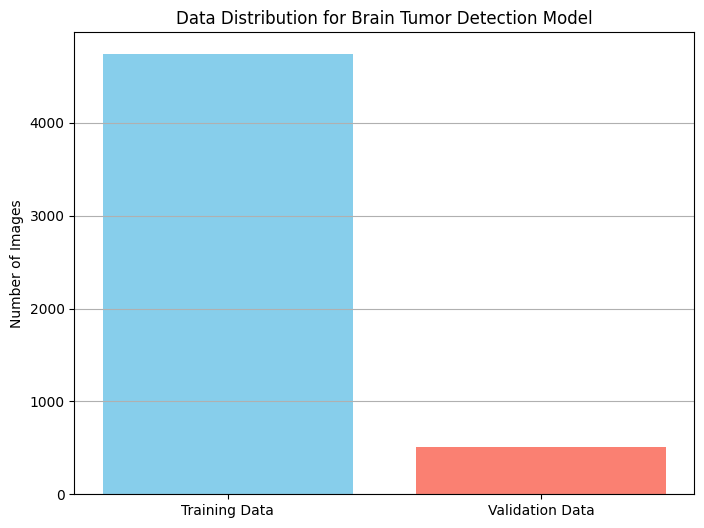

In [ ]:
labels = ['Training Data', 'Validation Data']
counts = [train_count, val_count]

plt.figure(figsize=(8,6))
plt.bar(labels, counts, color=['skyblue', 'salmon'])
plt.title('Data Distribution for Brain Tumor Detection Model')
plt.ylabel('Number of Images')
plt.grid(axis='y')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/brain_tumor_yolo_dataset'

Mounted at /content/drive


# YOLOv8n
# Modelling

In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 92.6MB/s]


In [ ]:
!ls /content/
!ls /content/brain_tumor_yolo_dataset/brain_tumor.yaml

brain_tumor_detection  drive  sample_data  yolov8n.pt
ls: cannot access '/content/brain_tumor_yolo_dataset/brain_tumor.yaml': No such file or directory


In [ ]:
model.train(
    data='/content/drive/MyDrive/brain_tumor_yolo_dataset/brain_tumor.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    workers=2,
    project='brain_tumor_detection',
    name='exp1'
)


Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/brain_tumor_yolo_dataset/brain_tumor.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=brain_tumor_detection, name=exp15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

100%|██████████| 755k/755k [00:00<00:00, 145MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 270MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.1±0.0 MB/s, size: 37.3 KB)


train: Scanning /content/drive/MyDrive/brain_tumor_yolo_dataset/images/train/Glioma/labels... 4737 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4737/4737 [1:43:14<00:00,  1.31s/it]


train: New cache created: /content/drive/MyDrive/brain_tumor_yolo_dataset/images/train/Glioma/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.0±0.0 MB/s, size: 26.3 KB)


val: Scanning /content/drive/MyDrive/brain_tumor_yolo_dataset/images/val/Glioma/labels... 510 images, 3 backgrounds, 0 corrupt: 100%|██████████| 512/512 [11:25<00:00,  1.34s/it]


val: New cache created: /content/drive/MyDrive/brain_tumor_yolo_dataset/images/val/Glioma/labels.cache
Plotting labels to brain_tumor_detection/exp15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to brain_tumor_detection/exp15
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.06G      1.028      2.372      1.218          3        640: 100%|██████████| 297/297 [01:43<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.13it/s]

                   all        512        554      0.827      0.739      0.824      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.55G      1.033      1.369      1.206          1        640: 100%|██████████| 297/297 [01:37<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.92it/s]

                   all        512        554      0.874      0.748      0.858      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.55G       1.04      1.128      1.211          2        640: 100%|██████████| 297/297 [01:32<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.62it/s]

                   all        512        554      0.808      0.747      0.823       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.58G      1.022     0.9918        1.2          2        640: 100%|██████████| 297/297 [01:30<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.33it/s]

                   all        512        554      0.887       0.82      0.896      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.6G     0.9899     0.8962      1.184          4        640: 100%|██████████| 297/297 [01:31<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.43it/s]

                   all        512        554      0.845      0.859      0.909      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.61G      0.973     0.8555      1.173          1        640: 100%|██████████| 297/297 [01:29<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.69it/s]

                   all        512        554       0.79      0.769      0.852       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.62G     0.9551     0.8195      1.158          2        640: 100%|██████████| 297/297 [01:30<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.61it/s]

                   all        512        554      0.851        0.8       0.89      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.65G     0.9562     0.7869      1.159          1        640: 100%|██████████| 297/297 [01:30<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.09it/s]

                   all        512        554      0.919      0.842      0.918      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.66G     0.9286     0.7475      1.151          1        640: 100%|██████████| 297/297 [01:31<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.11it/s]

                   all        512        554      0.905      0.854      0.924       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.68G     0.9212     0.7276      1.141          4        640: 100%|██████████| 297/297 [01:31<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.13it/s]

                   all        512        554      0.847      0.844       0.91      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.69G     0.8995     0.7084      1.129          2        640: 100%|██████████| 297/297 [01:32<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.23it/s]

                   all        512        554      0.892      0.899      0.933       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.72G     0.8921     0.6901      1.122          1        640: 100%|██████████| 297/297 [01:31<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.17it/s]

                   all        512        554      0.937      0.862      0.938      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.73G     0.8746     0.6625      1.113          2        640: 100%|██████████| 297/297 [01:31<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]

                   all        512        554      0.881      0.902      0.934      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.75G     0.8788     0.6596      1.116          2        640: 100%|██████████| 297/297 [01:32<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.00it/s]

                   all        512        554      0.915      0.901      0.949      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.76G     0.8682     0.6358      1.112          1        640: 100%|██████████| 297/297 [01:31<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.81it/s]

                   all        512        554      0.933      0.898      0.947      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.79G      0.869     0.6386      1.105          1        640: 100%|██████████| 297/297 [01:30<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.46it/s]

                   all        512        554      0.921      0.908       0.94      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.8G     0.8482      0.619      1.107          2        640: 100%|██████████| 297/297 [01:30<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.49it/s]

                   all        512        554      0.925      0.921      0.956      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.82G     0.8553     0.6071      1.107          3        640: 100%|██████████| 297/297 [01:30<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.50it/s]

                   all        512        554      0.943      0.913      0.955      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.83G     0.8432     0.5981      1.099          2        640: 100%|██████████| 297/297 [01:30<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.73it/s]

                   all        512        554      0.917      0.894      0.943      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.85G     0.8351     0.5852      1.094          2        640: 100%|██████████| 297/297 [01:30<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.18it/s]

                   all        512        554      0.944      0.913      0.954      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.87G     0.8302     0.5745      1.087          2        640: 100%|██████████| 297/297 [01:31<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.17it/s]

                   all        512        554      0.948       0.91      0.958      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.89G     0.8082     0.5686      1.073          0        640: 100%|██████████| 297/297 [01:32<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.12it/s]

                   all        512        554      0.922      0.915      0.954       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.89G      0.821     0.5713      1.083          2        640: 100%|██████████| 297/297 [01:33<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.19it/s]

                   all        512        554       0.94      0.914      0.952      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.92G     0.8143     0.5554      1.083          3        640: 100%|██████████| 297/297 [01:32<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.13it/s]

                   all        512        554      0.941      0.909      0.956      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.94G     0.8056      0.549      1.075          2        640: 100%|██████████| 297/297 [01:32<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.04it/s]

                   all        512        554      0.933      0.933      0.956       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.96G     0.8008     0.5345      1.076          5        640: 100%|██████████| 297/297 [01:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.17it/s]

                   all        512        554      0.932      0.929       0.96      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.96G     0.8144      0.533      1.086          1        640: 100%|██████████| 297/297 [01:31<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]

                   all        512        554      0.948      0.934      0.959      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.99G     0.7907     0.5283      1.069          1        640: 100%|██████████| 297/297 [01:31<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.63it/s]

                   all        512        554      0.946      0.923      0.959      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.01G     0.7872     0.5096      1.066          0        640: 100%|██████████| 297/297 [01:31<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.48it/s]

                   all        512        554      0.932      0.938      0.959      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.02G     0.7725      0.509      1.059          1        640: 100%|██████████| 297/297 [01:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.65it/s]

                   all        512        554      0.949       0.93      0.963      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.03G     0.7627     0.4895      1.055          1        640: 100%|██████████| 297/297 [01:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.71it/s]

                   all        512        554      0.948      0.931      0.959      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.06G     0.7858     0.5016      1.064          5        640: 100%|██████████| 297/297 [01:33<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.72it/s]

                   all        512        554      0.939      0.946      0.956      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.07G     0.7623     0.4922      1.059          3        640: 100%|██████████| 297/297 [01:33<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.73it/s]

                   all        512        554      0.942      0.947       0.96      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.09G     0.7645     0.4798      1.053          1        640: 100%|██████████| 297/297 [01:33<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.12it/s]

                   all        512        554      0.958       0.94      0.963      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       3.1G     0.7644     0.4789      1.052          1        640: 100%|██████████| 297/297 [01:33<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.00it/s]

                   all        512        554      0.953      0.918      0.958      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.12G     0.7544     0.4868      1.049          1        640: 100%|██████████| 297/297 [01:32<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.77it/s]

                   all        512        554      0.949      0.938      0.959      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.14G     0.7529     0.4656      1.044          1        640: 100%|██████████| 297/297 [01:30<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.47it/s]

                   all        512        554      0.944      0.934      0.959      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.16G      0.728     0.4476      1.035          1        640: 100%|██████████| 297/297 [01:29<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.47it/s]

                   all        512        554      0.947      0.942      0.965      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.17G     0.7406     0.4529      1.038          1        640: 100%|██████████| 297/297 [01:30<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.39it/s]

                   all        512        554      0.952       0.93      0.963      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.19G     0.7422     0.4508      1.044          4        640: 100%|██████████| 297/297 [01:30<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.56it/s]

                   all        512        554      0.946      0.944      0.964      0.785


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.21G     0.6884     0.3886       1.01          1        640: 100%|██████████| 297/297 [01:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.20it/s]

                   all        512        554      0.953       0.94      0.963      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.23G      0.675     0.3721      1.002          1        640: 100%|██████████| 297/297 [01:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.12it/s]

                   all        512        554       0.96      0.927      0.962       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.23G     0.6704     0.3643     0.9949          2        640: 100%|██████████| 297/297 [01:27<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.51it/s]

                   all        512        554      0.949       0.95      0.967      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.26G     0.6632     0.3702     0.9943          1        640: 100%|██████████| 297/297 [01:27<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.15it/s]

                   all        512        554      0.946      0.947      0.964      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.28G     0.6571     0.3506     0.9927          1        640: 100%|██████████| 297/297 [01:28<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.02it/s]

                   all        512        554      0.958      0.941      0.968      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       3.3G     0.6476     0.3429     0.9857          1        640: 100%|██████████| 297/297 [01:27<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.54it/s]

                   all        512        554      0.955      0.941      0.965      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       3.3G     0.6458     0.3465     0.9807          1        640: 100%|██████████| 297/297 [01:27<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.21it/s]

                   all        512        554      0.954      0.941      0.966      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.33G     0.6371     0.3335     0.9786          1        640: 100%|██████████| 297/297 [01:27<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.54it/s]

                   all        512        554      0.939      0.953      0.963      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.35G     0.6368     0.3442     0.9785          1        640: 100%|██████████| 297/297 [01:27<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.80it/s]

                   all        512        554      0.949      0.941      0.966        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.37G      0.627     0.3258     0.9703          2        640: 100%|██████████| 297/297 [01:28<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.29it/s]

                   all        512        554      0.951      0.942      0.967      0.803



50 epochs completed in 1.353 hours.
Optimizer stripped from brain_tumor_detection/exp15/weights/last.pt, 6.2MB
Optimizer stripped from brain_tumor_detection/exp15/weights/best.pt, 6.2MB

Validating brain_tumor_detection/exp15/weights/best.pt...
Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.04it/s]


                   all        512        554      0.951      0.943      0.967      0.803
                Glioma        135        153      0.916      0.889      0.934      0.761
            Meningioma        140        142      0.993      0.998      0.994      0.846
             Pituitary         98         98      0.977       0.98      0.989      0.847
              No Tumor        154        161      0.918      0.907      0.952      0.757
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to brain_tumor_detection/exp15


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7beb68cfd8d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

# Performance Metrics

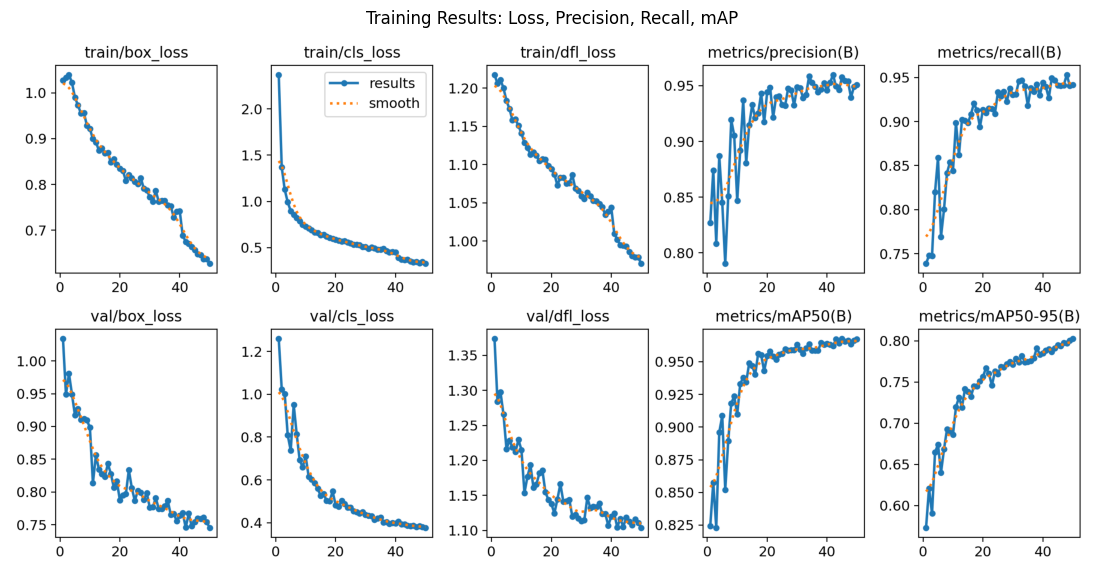

In [ ]:
results_path = '/content/drive/MyDrive/brain_tumor_detection/exp15/results.png'  # adjust if your path is different

# Check if results.png exists
if os.path.exists(results_path):
    img = plt.imread(results_path)
    plt.figure(figsize=(14,10))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Training Results: Loss, Precision, Recall, mAP')
    plt.show()
else:
    print("results.png not found. Check your training folder.")

In [ ]:

!ls /content/brain_tumor_detection/


exp1  exp12  exp13  exp14  exp15  exp152  exp153


In [ ]:
model.val()


Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 1.0±0.5 ms, read: 6.9±6.7 MB/s, size: 16.5 KB)


val: Scanning /content/drive/MyDrive/brain_tumor_yolo_dataset/images/val/Glioma/labels.cache... 510 images, 3 backgrounds, 0 corrupt: 100%|██████████| 512/512 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.85it/s]


                   all        512        554       0.95      0.943      0.968      0.802
                Glioma        135        153      0.914      0.889      0.933      0.762
            Meningioma        140        142      0.993      0.998      0.994      0.845
             Pituitary         98         98      0.976       0.98      0.989      0.846
              No Tumor        154        161      0.918      0.907      0.957      0.757
Speed: 1.0ms preprocess, 4.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to brain_tumor_detection/exp152


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bee27a2e4d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
from ultralytics import YOLO

# Load the uploaded model
model = YOLO('/content/drive/MyDrive/brain_tumor_detection/exp15/weights/best.pt')

In [ ]:
results = model.predict(source='/content/drive/MyDrive/brain_tumor/test/Tumor/Tr-gl_0401.jpg', save=True)



image 1/1 /content/drive/MyDrive/brain_tumor/test/Tumor/Tr-gl_0401.jpg: 640x640 1 Glioma, 382.3ms
Speed: 6.5ms preprocess, 382.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [ ]:
import pandas as pd

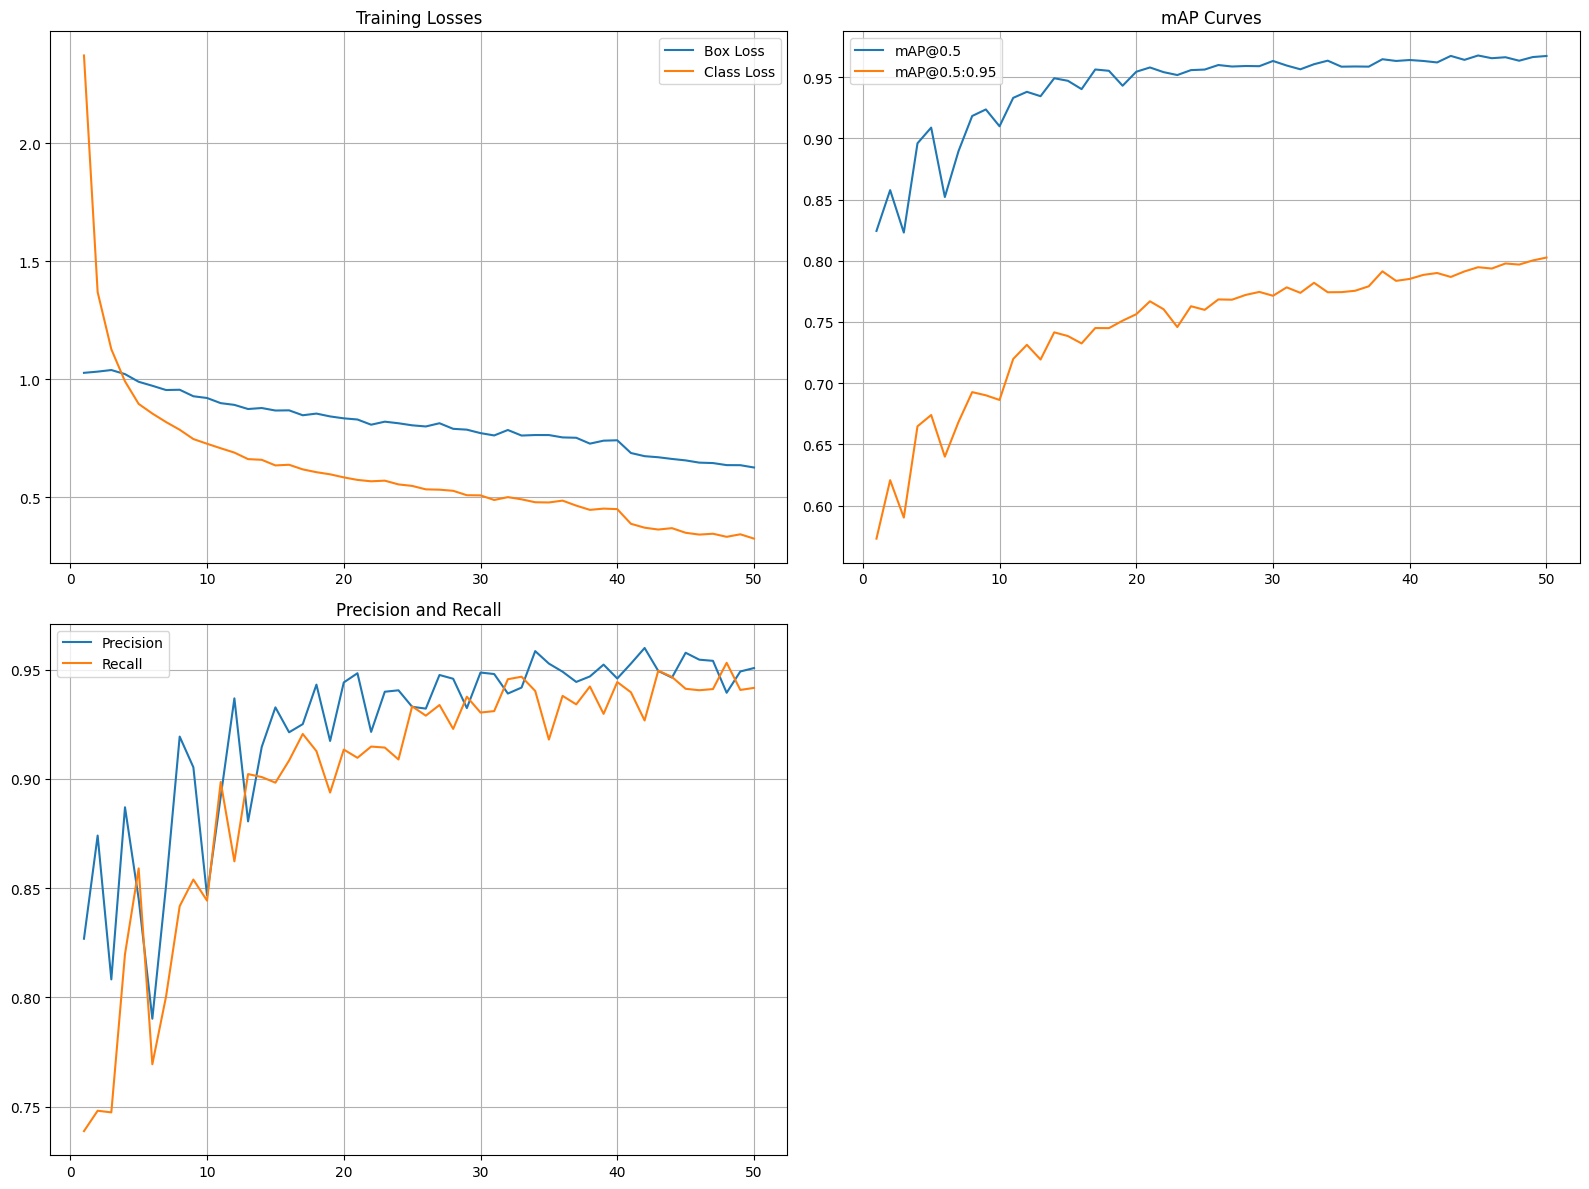

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
results = pd.read_csv('/content/brain_tumor_detection/exp15/results.csv')
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs[0, 0].plot(results['epoch'], results['train/box_loss'], label='Box Loss')
axs[0, 0].plot(results['epoch'], results['train/cls_loss'], label='Class Loss')
axs[0, 0].set_title('Training Losses')
axs[0, 0].legend()
axs[0, 0].grid()


axs[0, 1].plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@0.5')
axs[0, 1].plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
axs[0, 1].set_title('mAP Curves')
axs[0, 1].legend()
axs[0, 1].grid()

axs[1, 0].plot(results['epoch'], results['metrics/precision(B)'], label='Precision')
axs[1, 0].plot(results['epoch'], results['metrics/recall(B)'], label='Recall')
axs[1, 0].set_title('Precision and Recall')
axs[1, 0].legend()
axs[1, 0].grid()

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
results = pd.read_csv('/content/drive/MyDrive/brain_tumor_detection/exp15/results.csv')
print(results.columns)

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
def plot_images(image_paths):
    fig, axes = plt.subplots(len(image_paths), 1, figsize=(80, 80))

    for i, ax in enumerate(axes):
        image_path = image_paths[i]
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(os.path.basename(image_path))

    plt.tight_layout()
    plt.show()

# Performance Metrics


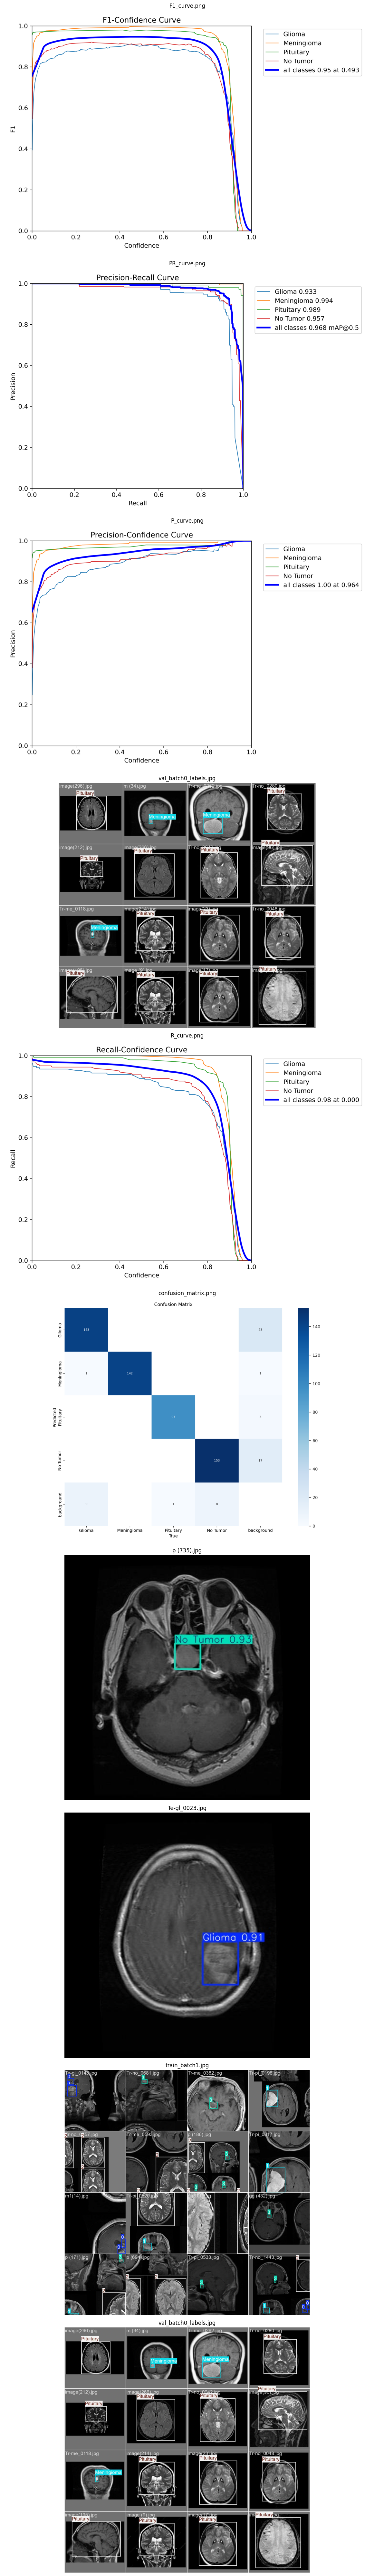

In [ ]:

image_paths = [
    '/content/drive/MyDrive/brain_tumor_detection/exp152/F1_curve.png',
    '/content/drive/MyDrive/brain_tumor_detection/exp152/PR_curve.png',
    '/content/drive/MyDrive/brain_tumor_detection/exp152/P_curve.png',
    '/content/drive/MyDrive/brain_tumor_detection/exp152/val_batch0_labels.jpg',
    '/content/drive/MyDrive/brain_tumor_detection/exp152/R_curve.png',
    '/content/drive/MyDrive/brain_tumor_detection/exp152/confusion_matrix.png',
    '/content/drive/MyDrive/brain_tumor_detection/exp153/p (735).jpg',
    '/content/drive/MyDrive/brain_tumor_detection/exp154/Te-gl_0023.jpg',
    '/content/drive/MyDrive/brain_tumor_detection/exp15/train_batch1.jpg',
    '/content/drive/MyDrive/brain_tumor_detection/exp15/val_batch0_labels.jpg'

]
plot_images(image_paths)

In [ ]:
!zip -r /content/runs.zip /content/runs/

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict5/ (stored 0%)
  adding: content/runs/detect/predict5/.ipynb_checkpoints/ (stored 0%)
  adding: content/runs/detect/predict4/ (stored 0%)
  adding: content/runs/detect/predict4/.ipynb_checkpoints/ (stored 0%)
  adding: content/runs/detect/.ipynb_checkpoints/ (stored 0%)
  adding: content/runs/detect/predict12/ (stored 0%)
  adding: content/runs/detect/predict12/.ipynb_checkpoints/ (stored 0%)
  adding: content/runs/detect/predict14/ (stored 0%)
  adding: content/runs/detect/predict14/8.jpg (deflated 9%)
  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/Tr-pi_0526.jpg (deflated 4%)
  adding: content/runs/detect/predict2/ (stored 0%)
  adding: content/runs/detect/predict2/.ipynb_checkpoints/ (stored 0%)
  adding: content/runs/detect/predict6/ (stored 0%)
  adding: content/runs/detect/predict6/Te-gl_0023.jpg (deflated 9%)
  adding: cont

In [ ]:
from google.colab import files
files.download('/content/runs.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_images_path = '/content/drive/MyDrive/brain_tumor_yolo_dataset/images/train'  # Update if needed

all_classes = [cls for cls in os.listdir(train_images_path) if not cls.startswith('.')]
print(f"Classes found (after cleaning): {all_classes}")

random_class = random.choice(all_classes)
random_class_path = os.path.join(train_images_path, random_class)

all_images = [img for img in os.listdir(random_class_path) if img.lower().endswith(('.jpg', '.png', '.jpeg'))]


num_samples = min(5, len(all_images))


sample_images = random.sample(all_images, num_samples)


plt.figure(figsize=(20, 10))
for idx, img_name in enumerate(sample_images):
    img_path = os.path.join(random_class_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img)
    plt.title(f"{random_class}", fontsize=16)
    plt.axis('off')
plt.tight_layout()
plt.show()

Classes found (after cleaning): ['Pituitary', 'Glioma', 'Meningioma', 'No Tumor']


<Figure size 2000x1000 with 0 Axes>

# testing

Classes found: ['Pituitary', 'Glioma', 'Meningioma', 'No Tumor']


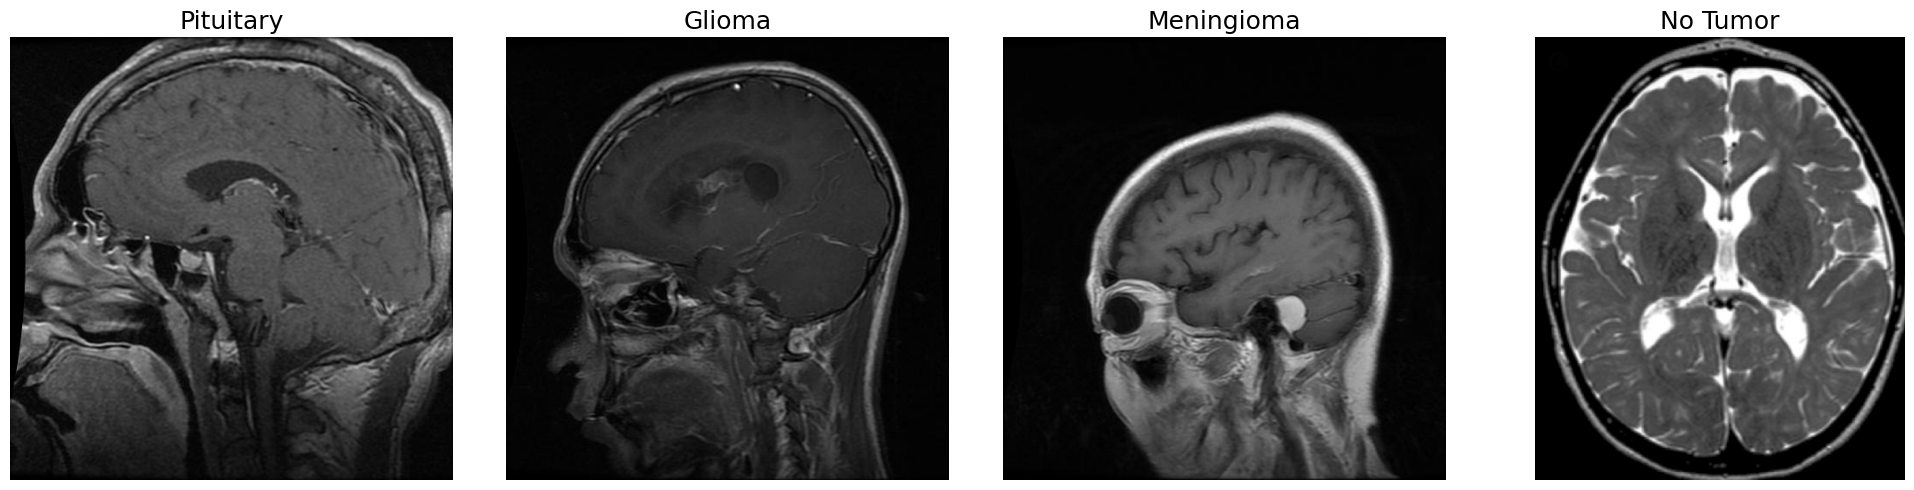

In [ ]:
train_images_path = '/content/drive/MyDrive/brain_tumor_yolo_dataset/images/train'

all_classes = [cls for cls in os.listdir(train_images_path) if not cls.startswith('.')]
print(f"Classes found: {all_classes}")


images_per_class = 4

plt.figure(figsize=(5 * images_per_class, 5 * len(all_classes)))

for class_idx, tumor_class in enumerate(all_classes):
    class_images_path = os.path.join(train_images_path, tumor_class, 'images')

    if not os.path.exists(class_images_path):
        print(f"No images folder found for {tumor_class}, skipping.")
        continue

    all_images = [img for img in os.listdir(class_images_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if len(all_images) == 0:
        print(f"No images found inside {tumor_class}/images/, skipping.")
        continue

    sample_images = random.sample(all_images, min(images_per_class, len(all_images)))

    for img_idx, img_name in enumerate(sample_images):
        img_path = os.path.join(class_images_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt_idx = class_idx * images_per_class + img_idx + 1
        plt.subplot(len(all_classes), images_per_class, plt_idx)
        plt.imshow(img)
        if img_idx == 0:
            plt.ylabel(tumor_class, fontsize=16)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
test_images_folder = '/content/drive/MyDrive/brain_tumor_yolo_dataset/random testing images'
all_test_images = [img for img in os.listdir(test_images_folder) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

random_images = random.sample(all_test_images, 5)

for img_name in random_images:
    img_path = os.path.join(test_images_folder, img_name)
    results = model.predict(source=img_path, save=True, imgsz=640, conf=0.5)


image 1/1 /content/drive/MyDrive/brain_tumor_yolo_dataset/random testing images/Tr-pi_0532.jpg: 640x640 1 No Tumor, 317.9ms
Speed: 11.3ms preprocess, 317.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict23

image 1/1 /content/drive/MyDrive/brain_tumor_yolo_dataset/random testing images/m (155).jpg: 640x640 1 Meningioma, 402.8ms
Speed: 6.9ms preprocess, 402.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict23

image 1/1 /content/drive/MyDrive/brain_tumor_yolo_dataset/random testing images/gg (136).jpg: 640x640 4 Gliomas, 359.1ms
Speed: 6.4ms preprocess, 359.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict23

image 1/1 /content/drive/MyDrive/brain_tumor_yolo_dataset/random testing images/m.jpg: 640x544 1 Meningioma, 369.7ms
Speed: 5.8ms preprocess, 369.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 544)
R

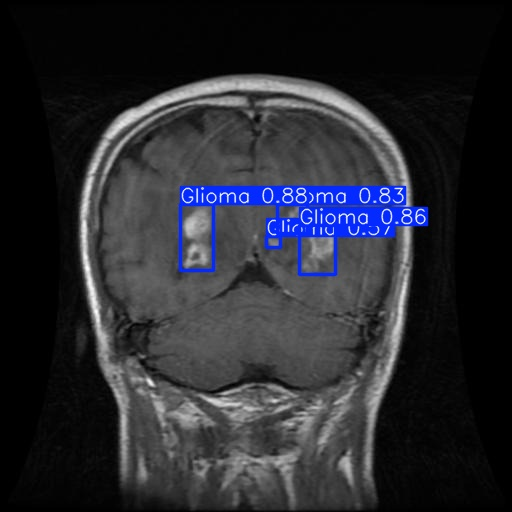

In [ ]:
test_images = Image.open("/content/runs/detect/predict23/gg (136).jpg")
test_images1 = Image.open("/content/runs/detect/predict23/Tr-pi_0532.jpg")
test_images2 = Image.open("/content/runs/detect/predict23/image(191).jpg")
test_images3 = Image.open("/content/runs/detect/predict23/m.jpg")
test_images

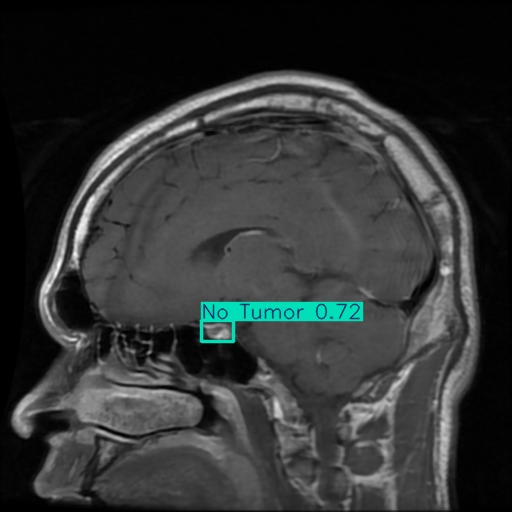

In [ ]:
test_images1

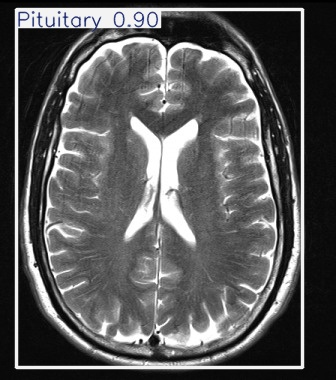

In [ ]:
test_images2

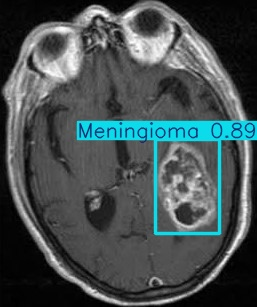

In [ ]:
test_images3

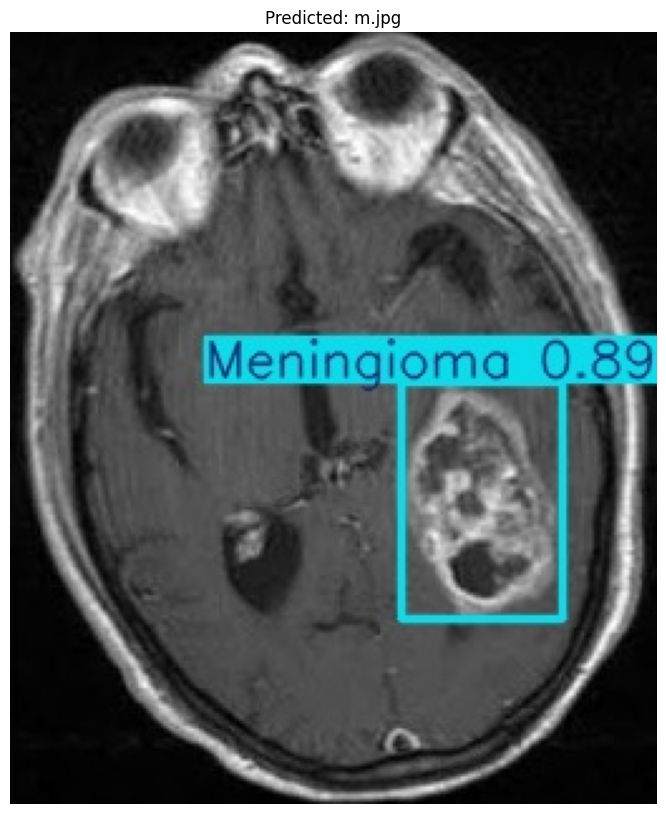

In [ ]:
predicted_folder = '/content/brain_tumor_detection/exp158'

predicted_images = [img for img in os.listdir(predicted_folder) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

plt.figure(figsize=(20,10))
for idx, img_name in enumerate(predicted_images[:3]):
    img_path = os.path.join(predicted_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, idx+1)
    plt.imshow(img)
    plt.title(f"Predicted: {img_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()

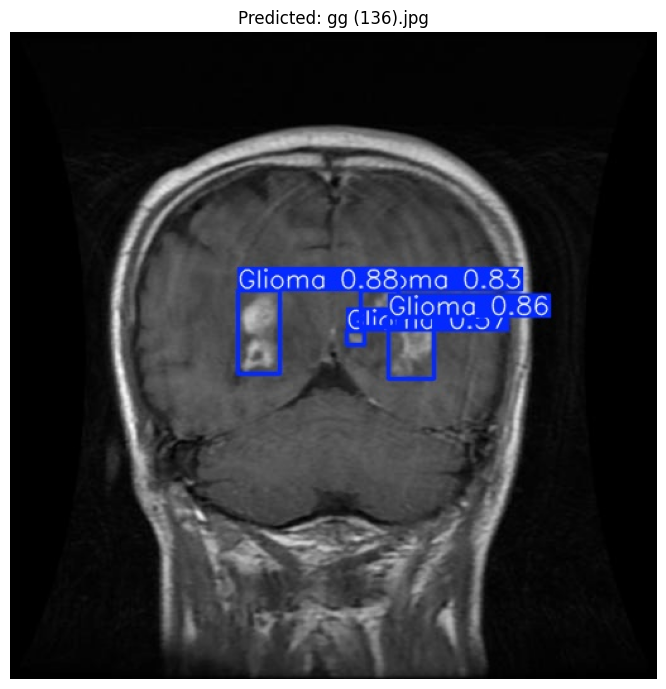

In [ ]:
predicted_folder = '/content/brain_tumor_detection/exp159/'

predicted_images = [img for img in os.listdir(predicted_folder) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

plt.figure(figsize=(20,10))
for idx, img_name in enumerate(predicted_images[:3]):
    img_path = os.path.join(predicted_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, idx+1)
    plt.imshow(img)
    plt.title(f"Predicted: {img_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
results = model.predict(source='/content/drive/MyDrive/brain_tumor_yolo_dataset/random testing images/m2 (6).jpg', save=True)


image 1/1 /content/drive/MyDrive/brain_tumor_yolo_dataset/random testing images/m2 (6).jpg: 640x640 1 Meningioma, 18.0ms
Speed: 6.9ms preprocess, 18.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict12


In [ ]:
predicted_folder = '/content/brain_tumor_detection/exp159/'

predicted_images = [img for img in os.listdir(predicted_folder) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

plt.figure(figsize=(20,10))
for idx, img_name in enumerate(predicted_images[:3]):
    img_path = os.path.join(predicted_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, idx+1)
    plt.imshow(img)
    plt.title(f"Predicted: {img_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
model = YOLO('/content/brain_tumor_detection/exp15/weights/best.pt')

image_path = '/content/drive/MyDrive/brain_tumor_detection/datasets/raw/Testing/glioma_tumor/image(100).jpg'
results = model.predict(source=image_path, conf=0.5, save=True)

scan_date = datetime.date.today()

report = f"Brain Tumor Detection Report\nScan Date: {scan_date}\n\n"

detections = results[0].boxes
if detections is None or detections.xywhn.shape[0] == 0:
    report += "Findings: No signs of tumor were detected in the scanned brain MRI.\n"
else:
    report += f"Findings: {detections.xywhn.shape[0]} tumor(s) detected in the MRI scan.\n\n"
    for idx, box in enumerate(detections):
        tumor_class = model.names[int(box.cls[0])]
        confidence = float(box.conf[0])
        x_center, y_center, width, height = box.xywhn[0]
        image_width = 640
        image_height = 640
        width_px = width * image_width
        height_px = height * image_height

        report += f"Tumor #{idx+1}:\n"
        report += f"- Tumor Type: {tumor_class}\n"
        report += f"- Confidence: {confidence:.2%}\n"
        report += f"- Center (Normalized): (X={x_center:.2f}, Y={y_center:.2f})\n"
        report += f"- Tumor Size: Width={width_px:.1f}px, Height={height_px:.1f}px\n\n"
print(report)


image 1/1 /content/drive/MyDrive/brain_tumor_detection/datasets/raw/Testing/glioma_tumor/image(100).jpg: 640x576 1 Meningioma, 8.5ms
Speed: 2.7ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 576)
Results saved to runs/detect/predict16
🧠 Brain Tumor Detection Report
Scan Date: 2025-04-28

Findings: 1 tumor(s) detected in the MRI scan.

Tumor #1:
- Tumor Type: Meningioma
- Confidence: 90.26%
- Center (Normalized): (X=0.36, Y=0.35)
- Tumor Size: Width=150.2px, Height=139.6px




In [ ]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=b6b149a509f84c8adad026effa2a4d6fe75e9694b4290f27034b1db436e28bef
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [ ]:
from fpdf import FPDF
import datetime

# Report Generation

In [ ]:
model = YOLO('/content/drive/MyDrive/brain_tumor_detection/exp15/weights/best.pt')

image_path = '/content/41598_2023_41576_Fig1_HTML.jpg'
results = model.predict(source=image_path, conf=0.5, save=True)
detections = results[0].boxes
predicted_folder = results[0].save_dir
predicted_image_path = f"{predicted_folder}/{image_path.split('/')[-1]}"
scan_date = datetime.date.today()
pdf = FPDF()
pdf.add_page()

pdf.set_font("Arial", 'B', 16)
pdf.cell(0, 10, "Brain Tumor Detection Report", ln=True, align="C")
pdf.ln(10)

pdf.set_font("Arial", '', 12)
pdf.cell(0, 10, f"Scan Date: {scan_date}", ln=True)
pdf.ln(10)

pdf.image(predicted_image_path, x=40, y=None, w=120)
pdf.ln(10)

pdf.set_font("Arial", '', 12)
pdf.cell(0, 10, "Findings:", ln=True)
pdf.ln(5)

if detections is None or detections.xywhn.shape[0] == 0:
    pdf.multi_cell(0, 10, "No signs of tumor were detected in the scanned brain MRI.")
else:
    for idx, box in enumerate(detections):
        tumor_class = model.names[int(box.cls[0])]
        confidence = float(box.conf[0])
        x_center, y_center, width, height = box.xywhn[0]
        image_width = 340
        image_height = 340
        width_px = width * image_width
        height_px = height * image_height

        finding_text = (f"Tumor #{idx+1}:\n"
                        f"- Tumor Type: {tumor_class}\n"
                        f"- Confidence: {confidence:.2%}\n"
                        f"- Location (Normalized Center): (X={x_center:.2f}, Y={y_center:.2f})\n"
                        f"- Tumor Size: Width={width_px:.1f}px, Height={height_px:.1f}px\n")
        pdf.multi_cell(0, 10, finding_text)
        pdf.ln(5)

output_pdf_path = '/content/brain_tumor_detection_report.pdf'
pdf.output(output_pdf_path)

print(f"Report generated and saved to {output_pdf_path}")


image 1/1 /content/41598_2023_41576_Fig1_HTML.jpg: 640x640 1 Meningioma, 301.0ms
Speed: 18.2ms preprocess, 301.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict24
Report generated and saved to /content/brain_tumor_detection_report.pdf
